In [1]:
# block 1: import of all useful libraries and the data file used
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt 
import datetime as dt
data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

In [2]:
# block 2: creation of different variables uses 
# Assignment for each variable of data coming from the file import (data of the type ndarrays) 
data_U = data['U']
data_V = data['V']
data_depthV = data['depthV']
data_t = data['t']
data_timeDV = data['timeDV']                                          
data_u25 = data['u25']                            
data_u55 = data['u55']
data_u90 = data['u90']
data_v25 = data['v25']
data_v55 = data['v55']
data_v90 = data['v90']

In [3]:
# block 3: Conversion of Matlab time data to 'classic python time data.
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                         
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366) 
    return day + dayfrac
t = data_t[0,:]

In [4]:
# block 4: Creation of time and power variables
# Convert Matlab variable "t" into list of python datetime objects
# Creation of the variable P (Power density of the current).
# Creation of the average of the power density for the four years of data on the entire water column
py_t = [matlab2datetime(tval) for tval in t]
V = (data_U*data_U) + (data_V*data_V)
Vf = np.sqrt(V)                        
P = 0.5 * 1025 * 4 * (Vf*Vf*Vf)    
Pf = P/1000                    
Pmd = np.nanmean(Pf,axis=1) 

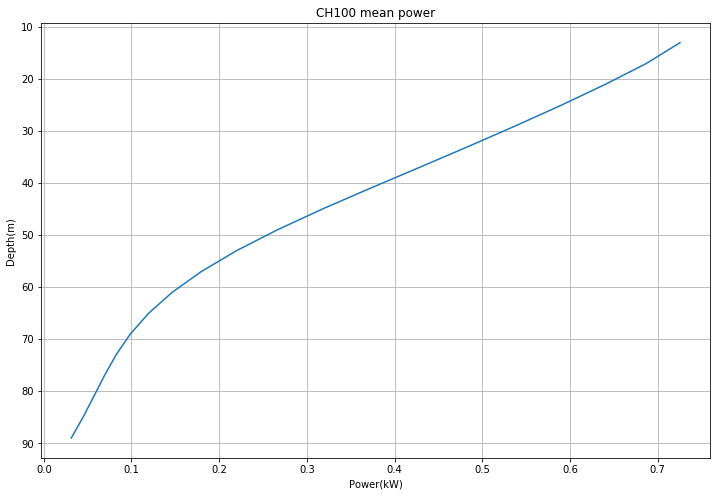

In [6]:
# block 5:Creation of the graph with the variables 'Pmf' and 'data_depthV' 
# for the means power in all the water column
t = data_t[0,:]               
plt.rcParams['figure.figsize'] = (12,8) 
plt.plot(Pmd,data_depthV[:,0])
plt.xlabel("Power(kW)")             
plt.ylabel("Depth(m) ")
plt.gca().invert_yaxis()
plt.title("CH100 mean power")
plt.grid(True)                       
 
plt.show()